# Analyzing and visulazing WeRateDogs Twittre Account
prepered by: Nouf AlGhamdi

## Report: act_report
* Create a **250-word-minimum written report** called "act_report.pdf" or "act_report.html" that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

### Retrieve the tidy/clean Dataset:

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tweepy 
import json 
%matplotlib inline

df = pd.read_csv('./twitter_archive_master.csv')
df.head(3)

,tweet_id,source,text,rating_numerator,rating_denominator,name,year,month,day,dog_stage,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,favorite_count,retweet_count
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,2017,8,1,NaN,...,False,Bagel,0.085851,False,Banana,0.076110,False,None,39467,8853
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,2017,8,1,NaN,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,Chihuahua,33819,6514
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,2017,7,31,NaN,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,Chihuahua,25461,4328


### Insights and Visualization
1. What are the most common dog names?

2. Which dog breads has the most likes?

3. Months with the most engaging rate in 2017 (based on the number of retweets)?¶

4. The Percentage of Dog Stages in WeRateDogs

5. The Percentage of Different Sources of the Tweets at WeRateDogs


#### Insight (1) : What are the most common dog names?

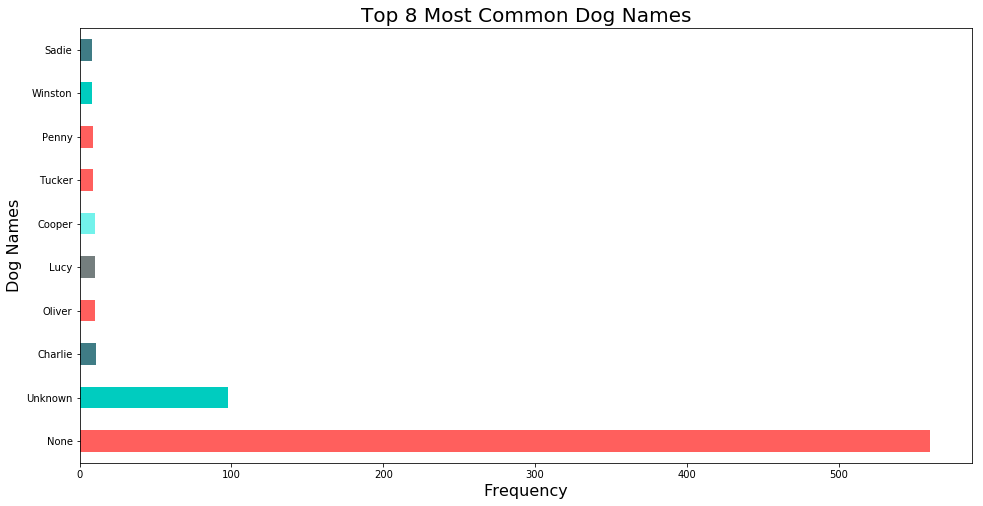

In [10]:

#  - - - - Insight(1) : Retrive the dog names from 'name' column and Select the top 10 names by most frequncies.


#Plot of the Top 8 Most common dog names:

top_dog_names_plot = df['name'].value_counts().sort_values(ascending=False).head(10)
top_dog_names_plot.plot(kind = "barh", figsize = (16, 8),color = ['#FF5F5D',"#00CCBF","#3F7C85",'#FF5F5D','#747E7E' ,"#72F2EB"]  )
plt.title("Top 8 Most Common Dog Names", fontsize =20)
plt.xlabel("Frequency", fontsize = 16)
plt.ylabel("Dog Names", fontsize = 16)
plt.show()

##### Note: As we can see from the plot above: Charlie is the most common dog name in the dataset we have, next comes Lucy, then Copper


----
#### Insight (2) : Which dog breads has the most likes?

In [11]:

#  - - - - Insight(2) : Retrive the dog breesa and sorted by the top liked ones 
most_liked_dog_breed = df.groupby('dog_breed')['favorite_count'].sum().reset_index(name = "most_liked_dogbreed")
most_liked_dog_breed = most_liked_dog_breed.sort_values('most_liked_dogbreed',ascending=False).head(10) # get the 10 highest budgets of gebres
most_liked_dog_breed

,dog_breed,most_liked_dogbreed
74,None,2006510
45,Golden Retriever,1633380
62,Labrador Retriever,1104066
81,Pembroke,969613
27,Chihuahua,569888
41,French Bulldog,515823
89,Samoyed,472290
28,Chow,409326
83,Pug,349437
104,Toy Poodle,331377


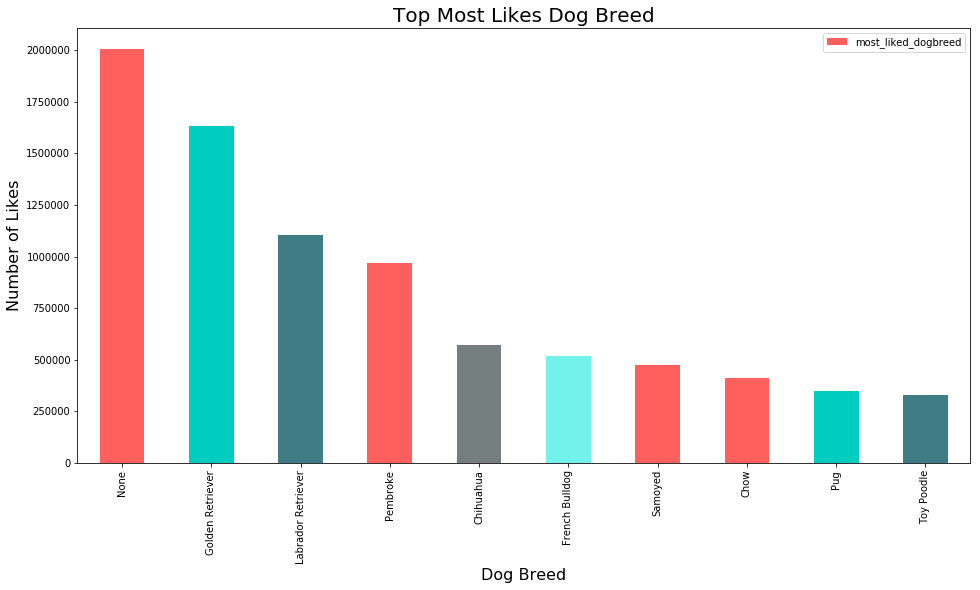

In [12]:

most_liked_dog_breed.plot(x='dog_breed',y='most_liked_dogbreed', kind = "bar", figsize = (16, 8),color = ['#FF5F5D',"#00CCBF","#3F7C85",'#FF5F5D','#747E7E' ,"#72F2EB"]  )
plt.title("Top Most Likes Dog Breed", fontsize =20)
plt.xlabel("Dog Breed", fontsize = 16)
plt.ylabel("Number of Likes", fontsize = 16)
plt.show()

##### Note: The table above indicates that Golden Retrievers are the most popular dog breed in this Twitter account, followed by Labrador Retrievers, then Pembroke Welsh Corgis.


----
#### Insight (3) : Months with the most engaging rate in 2017 (based on the number of retweets)? 

In [6]:

engaging_per_month_2017 = df.loc[df['year'] == 2017]
engaging_per_month_2017 = df.groupby(['month'])['retweet_count'].sum().reset_index(name = "engaging_per_month_2017")
engaging_per_month_2017 = engaging_per_month_2017.sort_values(['month'],ascending=True).head(10) # get the 10 highest budgets of gebres
engaging_per_month_2017

,month,engaging_per_month_2017
0,1,680449
1,2,432443
2,3,468404
3,4,331193
4,5,444467
5,6,599325
6,7,614060
7,8,239677
8,9,259646
9,10,247712


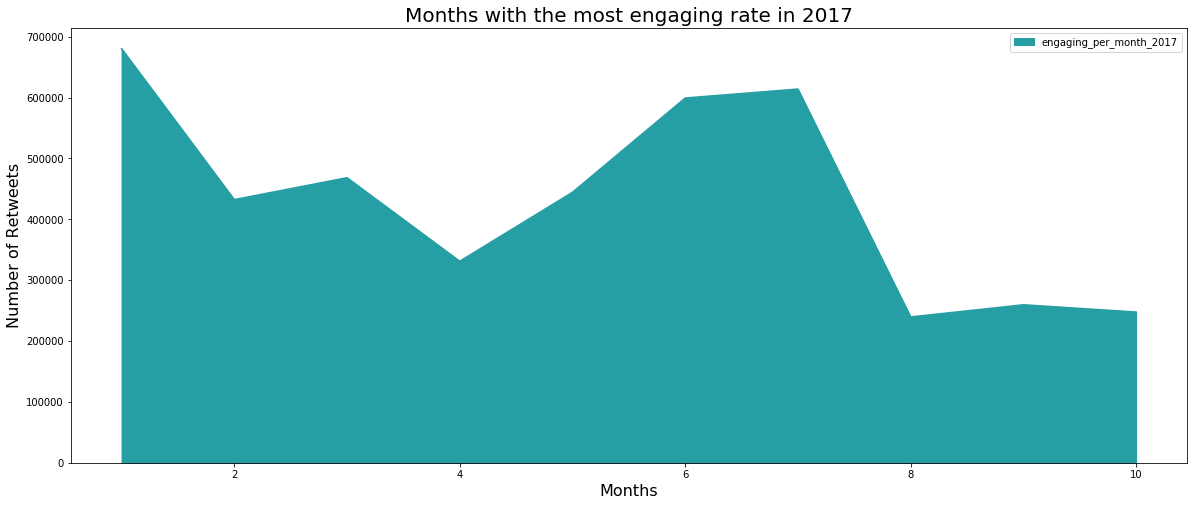

In [13]:
#      A R E A   P L O T :
engaging_per_month_2017.plot(x='month' ,y = "engaging_per_month_2017", kind = "area", figsize = (20, 8),color = ["#259EA4"])
plt.title("Months with the most engaging rate in 2017", fontsize =20)
plt.ylabel("Number of Retweets", fontsize = 16)
plt.xlabel("Months", fontsize = 16)
plt.show()

##### Note: As can be seen in the graph above, the highest engagement rate in 2017 occurred in the first month of that year, then started to decline sharply, then began to rise again in the fourth month, reaching its second highest point in the seventh month.

----
#### Insight (4) :  The Percentage of Dog Stages in WeRateDogs

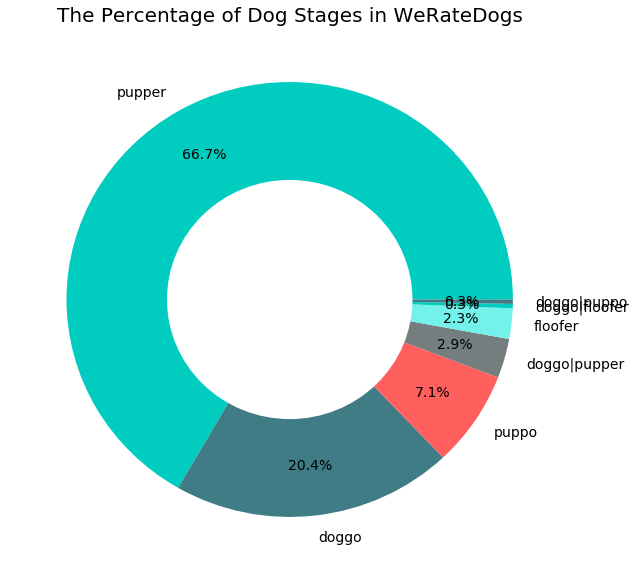

In [8]:
#      P I E   P L O T :
plt.figure(figsize=(10,10))
series = df['dog_stage'].value_counts() # data we need
pallete4 = ["#61B8A9","#67606F","#438B7E","#B0A48F"] 
labels = series.index # to set labels 
values = series.values # to set a values 
# colors

palette1 = ["#8BC1C2","#91B9A3"] # colour palette(1)

colors = ["#00CCBF","#3F7C85",'#FF5F5D','#747E7E' ,"#72F2EB"] 
  
# explosion

# Pie Chart
plt.pie(values, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.77, textprops={'fontsize': 14})
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('The Percentage of Dog Stages in WeRateDogs',fontsize = 20)
  
# Displaying Chart
plt.show()

##### Note: The pupper stage has the highest percentage with 66.7% where the (doggo|floofer) and (doggo|puppo) has the lowest precentage.

-----
#### Insight (5) :  The Percentage of Different Sources of the Tweets at WeRateDogs

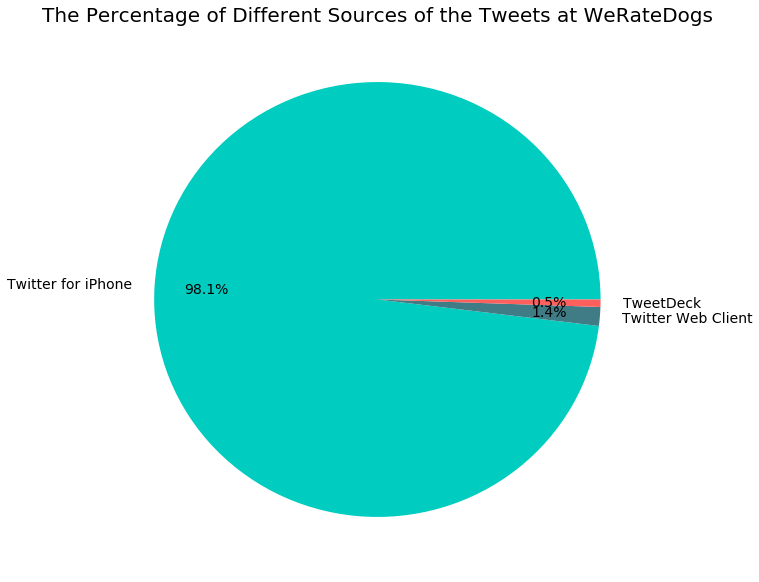

In [9]:
plt.figure(figsize=(10,10))
series2 = df['source'].value_counts() # data we need
pallete4 = ["#61B8A9","#67606F","#438B7E","#B0A48F"] 
labels = series2.index # to set labels 
values = series2.values # to set a values 
# colors

colors = ['#00CCBF',"#3F7C85",'#FF5F5D','#00CCBF' ,"#72F2EB"] 
 
# Pie Chart
plt.pie(values, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.77, textprops={'fontsize': 14})
  
# Adding Title of chart
plt.title('The Percentage of Different Sources of the Tweets at WeRateDogs',fontsize = 20)
  
# Displaying Chart
plt.show()